# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Install Datasets and Upgrade TensorFlow

To ensure we can download the latest version of the `oxford_flowers102` dataset, let's first install both `tensorflow-datasets` and `tfds-nightly`.
* `tensorflow-datasets` is the stable version that is released on a cadence of every few months
* `tfds-nightly` is released every day and has the latest version of the datasets

We'll also upgrade TensorFlow to ensure we have a version that is compatible with the latest version of the dataset.

In [1]:
!ls -la

total 72216
drwxr-xr-x 3 root root     4096 Jun 18 00:16 ~
drwxr-xr-x 7 root root     4096 Jun 19 22:55 .
drwxr-xr-x 1 root root     4096 Jun 20 00:48 ..
-rw-r--r-- 1 root root 19290792 Jun 19 01:15 1655601303.h5
drwxr-xr-x 2 root root     4096 Oct  3  2019 assets
-rw-r--r-- 1 root root 33467632 Jun 19 22:42 best_model2.h5
-rw-r--r-- 1 root root 19290792 Jun 19 00:12 best_model.h5
drwxr-xr-x 2 root root     4096 Oct  3  2019 .ipynb_checkpoints
-rw-r--r-- 1 root root     2218 Oct  3  2019 label_map.json
-rw-r--r-- 1 root root  1768855 Jun 19 22:55 Project_Image_Classifier_Project.ipynb
drwxr-xr-x 2 root root     4096 Jun 18 13:32 __pycache__
drwxr-xr-x 2 root root     4096 Oct  3  2019 test_images
-rw-r--r-- 1 root root     1540 Jun 18 13:30 workspace_utils.py


In [1]:
%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
%pip --no-cache-dir install --upgrade tensorflow --user

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 4.3MB 5.0MB/s eta 0:00:01     |███████                         | 952kB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 102kB 30.3MB/s ta 0:00:01
     |████████████████████████████████| 409kB 29.5MB/s eta 0:00:01
ERROR: tensorflow-metadata 0.14.0 has requirement protobuf<4,>=3.7, but you'll have protobuf 4.21.1 which is incompatible.
ERROR: importlib-resources 5.8.0 has requirement zipp>=3.1.0; python_version < "3.10", but you'll have zipp 0.6.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


     |█████▍                          | 85.4MB 33.7MB/s eta 0:00:13

     |█████▋                          | 90.0MB 33.7MB/s eta 0:00:13

     |█████▉                          | 93.2MB 33.7MB/s eta 0:00:13

     |██████                          | 94.8MB 33.7MB/s eta 0:00:13

     |██████▏                         | 98.1MB 33.2MB/s eta 0:00:13

     |██████▍                         | 103.0MB 33.2MB/s eta 0:00:13

     |██████▌                         | 104.6MB 33.2MB/s eta 0:00:13

     |██████▋                         | 106.3MB 33.2MB/s eta 0:00:13

     |██████▊                         | 108.0MB 33.2MB/s eta 0:00:13

     |██████▉                         | 109.5MB 33.2MB/s eta 0:00:13

     |███████                         | 110.9MB 33.2MB/s eta 0:00:13

     |███████▏                        | 114.2MB 33.2MB/s eta 0:00:12

     |███████▎                        | 115.8MB 33.2MB/s eta 0:00:12

     |███████▍                        | 117.5MB 33.2MB/s eta 0:00:12

     |███████▌                        | 119.1MB 33.2MB/s eta 0:00:12

     |███████▌                        | 120.8MB 33.2MB/s eta 0:00:12

     |███████▉                        | 125.7MB 33.2MB/s eta 0:00:12

     |████████                        | 127.4MB 29.9MB/s eta 0:00:13

     |████████                        | 129.0MB 29.9MB/s eta 0:00:13

     |████████▎                       | 132.2MB 29.9MB/s eta 0:00:13

     |████████▍                       | 133.9MB 29.9MB/s eta 0:00:13

     |████████▌                       | 135.6MB 29.9MB/s eta 0:00:13

     |████████▊                       | 138.8MB 29.9MB/s eta 0:00:13

     |████████▉                       | 140.4MB 29.9MB/s eta 0:00:13

     |████████▉                       | 141.9MB 29.9MB/s eta 0:00:13

     |█████████                       | 143.4MB 29.9MB/s eta 0:00:13

     |█████████                       | 145.1MB 29.9MB/s eta 0:00:13

     |█████████▍                      | 149.8MB 29.9MB/s eta 0:00:13

     |█████████▋                      | 153.1MB 29.9MB/s eta 0:00:12

     |█████████▊                      | 154.7MB 29.9MB/s eta 0:00:12

     |█████████▊                      | 156.3MB 29.9MB/s eta 0:00:12

     |████████████████████████████████| 511.7MB 33.8MB/s eta 0:00:01     |██████████                      | 159.4MB 11.3MB/s eta 0:00:32     |██████████▌                     | 167.6MB 11.3MB/s eta 0:00:31     |███████████▎                    | 180.4MB 11.3MB/s eta 0:00:30     |███████████▍                    | 182.0MB 11.3MB/s eta 0:00:30     |███████████▋                    | 186.5MB 37.0MB/s eta 0:00:09     |████████████                    | 192.7MB 37.0MB/s eta 0:00:09     |████████████▏                   | 194.4MB 37.0MB/s eta 0:00:09     |████████████▉                   | 205.3MB 37.0MB/s eta 0:00:09     |█████████████▊                  | 219.8MB 30.6MB/s eta 0:00:10     |██████████████                  | 223.1MB 30.6MB/s eta 0:00:10     |██████████████▌                 | 231.2MB 30.6MB/s eta 0:00:10     |██████████████▋                 | 234.1MB 30.6MB/s eta 0:00:10     |██████████████▊                 | 235.8MB 30.6MB/s eta 0:00:10     |██████████████▉                 | 237.3MB 

     |████████████████████████████████| 1.1MB 51.0MB/s eta 0:00:01
     |████████████████████████████████| 40kB 42.9MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 15.8MB/s eta 0:00:01
     |████████████████████████████████| 2.4MB 24.4MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 23.3MB/s eta 0:00:01
     |████████████████████████████████| 174kB 58.1MB/s eta 0:00:01
     |████████████████████████████████| 225kB 14.0MB/s eta 0:00:01    |███████████▋                    | 81kB 40.1MB/s eta 0:00:01
     |████████████████████████████████| 4.9MB 34.2MB/s eta 0:00:01
     |████████████████████████████████| 788kB 39.0MB/s eta 0:00:01
     |████████████████████████████████| 163kB 58.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 22.7MB/s eta 0:00:01     |█████████████████████▎          | 51kB 32.6MB/s eta 0:00:01
     |████████████████████████████████| 153kB 55.5MB/s eta 0:00:01
  Found existing installation: protobuf 4.21.1
    Uninstalling proto

Note: you may need to restart the kernel to use updated packages.


After the above installations have finished **be sure to restart the kernel**. You can do this by going to **Kernel > Restart**.

In [1]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TODO: Make all other necessary imports.
import os
from PIL import Image
from workspace_utils import active_session
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [3]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()

# TODO: Create a training set, a validation set and a test set.

dataset, dataset_inf = tfds.load('oxford_flowers102', as_supervised=True,with_info=True)

training_set=dataset['train']
validation_set=dataset['validation']
test_set=dataset['test']

## Explore the Dataset

In [5]:
dataset_inf

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

In [6]:
# TODO: Get the number of examples in each set from the dataset info.

# TODO: Get the number of classes in the dataset from the dataset info.
number_classes = dataset_inf.features['label'].num_classes
number_examples_train = dataset_inf.splits['train'].num_examples
number_examples_val = dataset_inf.splits['validation'].num_examples
number_examples_test = dataset_inf.splits['test'].num_examples
print('Statistics of Dataset')
print('\u2022 {:,} nro. train examples'.format(number_examples_train))
print('\u2022 {:,} nro. validation examples'.format(number_examples_val))
print('\u2022 {:,} nro. test examples'.format(number_examples_test))
print('\u2022 {:,} classes'.format(number_classes))

Statistics of Dataset
• 1,020 nro. train examples
• 1,020 nro. validation examples
• 6,149 nro. test examples
• 102 classes


In [7]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

for image, label in training_set.take(3):
    image = image.numpy()
    label = label.numpy()
    print('The shape of this image is:',image.shape)
    print('The label of this image is:',label)

The shape of this image is: (500, 667, 3)
The label of this image is: 72
The shape of this image is: (500, 666, 3)
The label of this image is: 84
The shape of this image is: (670, 500, 3)
The label of this image is: 70


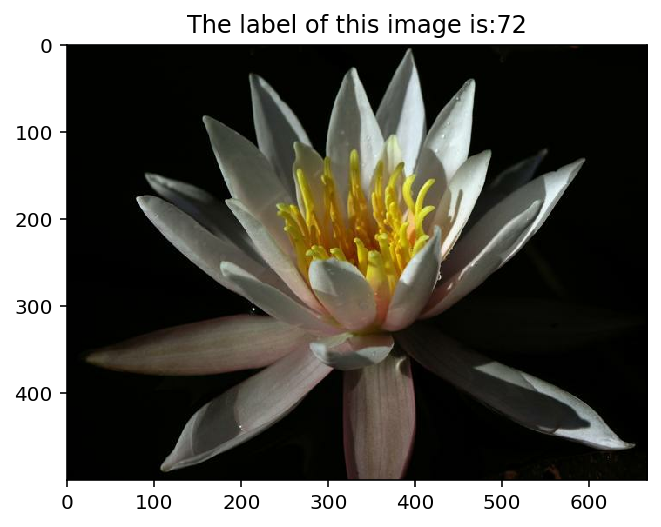

In [8]:
# TODO: Plot 1 image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image)
    plt.title('The label of this image is:'+str(label))
    plt.show()
# Set the title of the plot to the corresponding image label. 

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [10]:
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

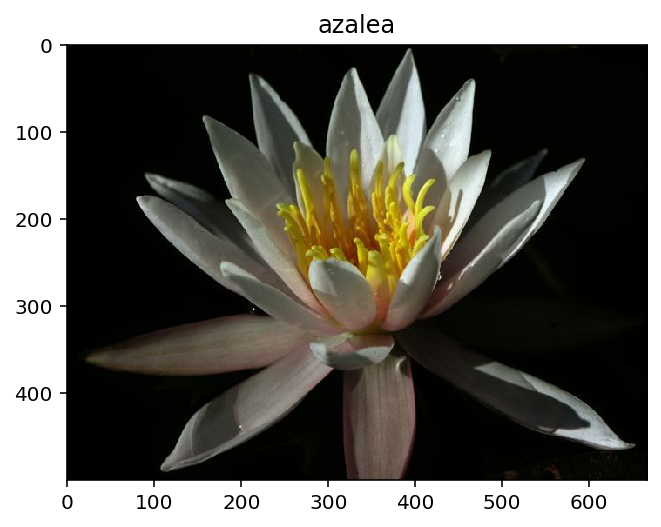

In [11]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image)
    plt.title(class_names[str(label)])

## Create Pipeline

In [12]:
# TODO: Create a pipeline for each set.
tf.random.set_seed(32)
np.random.seed(32)

batch_size = 32
image_size = 224

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label
    
training_batches = training_set.shuffle(number_examples_train//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [13]:
# TODO: Build and train your network.

tf.keras.backend.clear_session()

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

feature_extractor.trainable = False

model = tf.keras.Sequential([
        feature_extractor
])

layers_neurons = [512, 256, 128]

for neurons in layers_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    
model.add(tf.keras.layers.Dense(102, activation='softmax'))

model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropo

In [14]:
print('List of GPU Available:',tf.config.list_physical_devices('GPU'))
print('List of GPU Available:',tf.config.list_physical_devices('CPU'))

List of GPU Available: []
List of GPU Available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [15]:
import time


model.compile(
#     optimizer = 'adam',
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=6)

save_best = tf.keras.callbacks.ModelCheckpoint('./best_model3.h5',
                                              monitor='val_loss',
                                              save_best_only=True)
start_time = time.time()

with active_session():
    history = model.fit(training_batches,
                        epochs=EPOCHS,
                        callbacks=[early_stopping, save_best],
                        validation_data=validation_batches
                       )

end_time = time.time()

print('elapse time:',end_time-start_time)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 4.7091 - accuracy: 0.0206WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f088926ba70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 47s 1s/step - loss: 4.7091 - accuracy: 0.0206 - val_loss: 4.5072 - val_accuracy: 0.0431
Epoch 2/100
32/32 [==============================] - 42s 1s/step - loss: 4.4634 - accuracy: 0.0441 - val_loss: 4.2101 - val_accuracy: 0.1235
Epoch 3/100
32/32 [==============================] - 43s 1s/step - loss: 4.0996 - accuracy: 0.0853 - val_loss: 3.6004 - val_accuracy: 0.2775
Epoch 4/100
32/32 [==============================] - 42s 1s/step - loss: 3.5119 - accuracy: 0.1863 - val_loss: 2.8636 - val_accuracy: 0.3588
Epoch 5/100
32/32 [==============================] - 42s 1s/step - loss: 2.9185 - accuracy: 0.2647 - val_loss: 2.2930 - val_accuracy: 0.5

In [20]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
loss_training, accuracy_training = model.evaluate(training_batches)
loss_validation, accuracy_validation = model.evaluate(validation_batches)

32/32 [==============================] - 21s 648ms/step - loss: 1.2255 - accuracy: 0.7490


In [21]:
print('Loss of the Training Set: {:,.3f}'.format(loss_training))
print('Accuracy of the Training Set: {:,.3f}'.format(accuracy_training))
print('Loss of the validation Set: {:,.3f}'.format(loss_validation))
print('Accuracy of the Validation Set: {:,.3f}'.format(accuracy_validation))

Loss of the Training Set: 0.002
Accuracy of the Training Set: 0.999
Loss of the validation Set: 1.226
Accuracy of the Validation Set: 0.749


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [22]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss_test, accuracy_test = model.evaluate(testing_batches)

print('Loss of the test Set: {:,.3f}'.format(loss_test))
print('Accuracy of the test Set: {:,.3f}'.format(accuracy_test))

193/193 [==============================] - 127s 655ms/step - loss: 1.3721 - accuracy: 0.7195
Loss of the test Set: 1.372
Accuracy of the test Set: 0.719


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [23]:
# TODO: Save your trained model as a Keras model.
t=time.time()

saved_keras_model_filepath = './{}.h5'.format(int(t))

model.save(saved_keras_model_filepath)

## Load the Keras Model

Load the Keras model you saved above.

In [4]:
# TODO: Load the Keras model

import keras 

model_load = keras.models.load_model('./best_model3.h5',custom_objects={'KerasLayer':hub.KerasLayer})

model_load.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropo

In [26]:
loss_test, accuracy_test = model_load.evaluate(testing_batches)

print('Loss of the test Set: {:,.3f}'.format(loss_test))
print('Accuracy of the test Set: {:,.3f}'.format(accuracy_test))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
193/193 [==============================] - 125s 642ms/step - loss: 1.1141 - accuracy: 0.7382
Loss of the test Set: 1.114
Accuracy of the test Set: 0.738


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [5]:
def process_image(img):
    tf_img = tf.convert_to_tensor(img, dtype=tf.float32)
    tf_img = tf.image.resize(tf_img,(224,224))
    tf_img /= 255
    return tf_img.numpy()

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

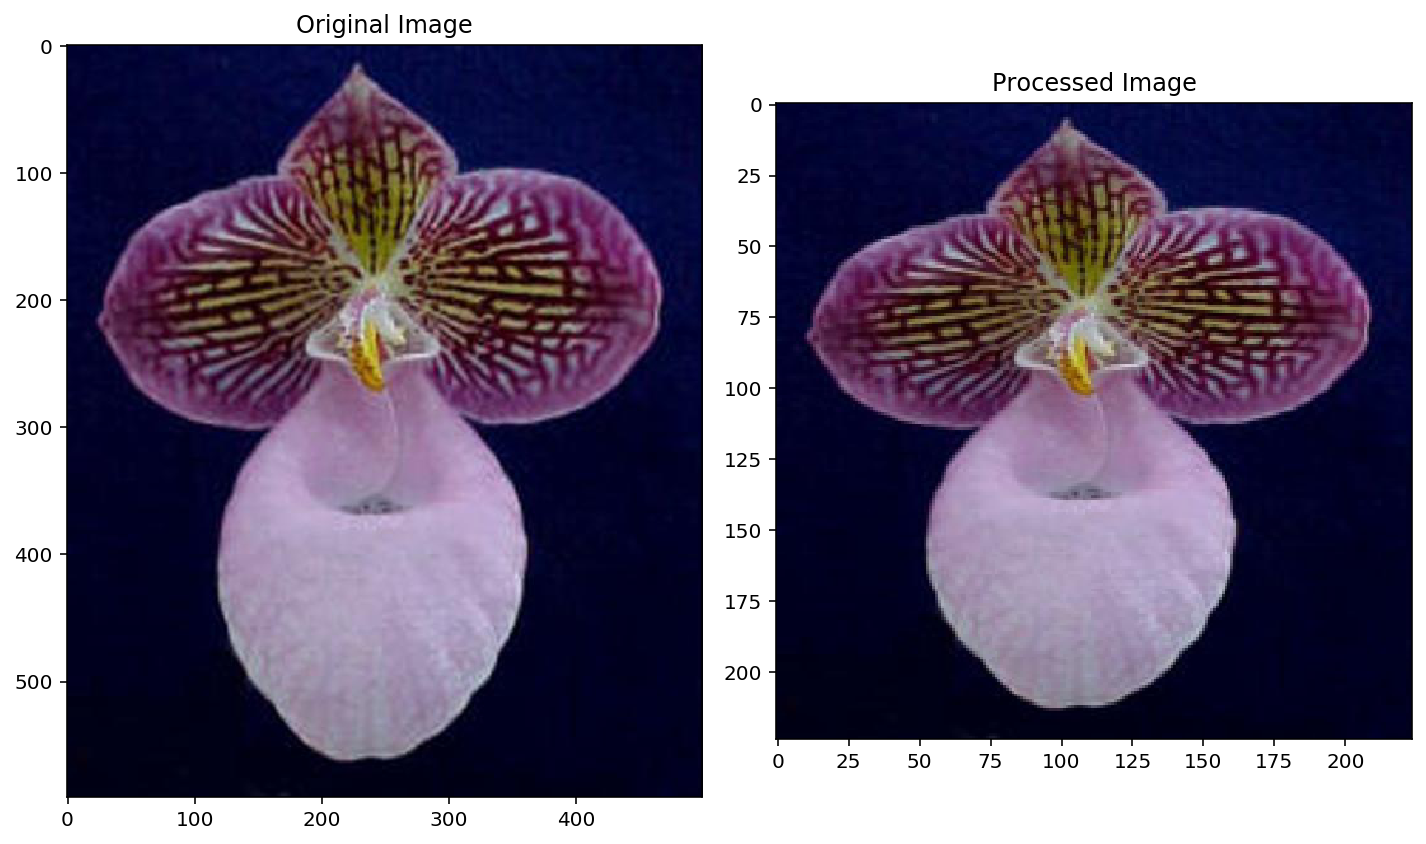

In [6]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [7]:
# TODO: Create the predict function
def predict(image_path, model, k=5):
    output=[]
    image = Image.open(image_path)
    image = np.array(image)
    image = np.expand_dims(image,axis=0)
    predict = model.predict(process_image(image))
    prob_classes=list(zip(list(predict[0]),map(str,list(range(102)))))
    prob_classes.sort(reverse=True,key=lambda x:x[0])
    sub=prob_classes[:k]
    return tuple(x[0] for x in sub),tuple(x[1] for x in sub)

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 58ms/step


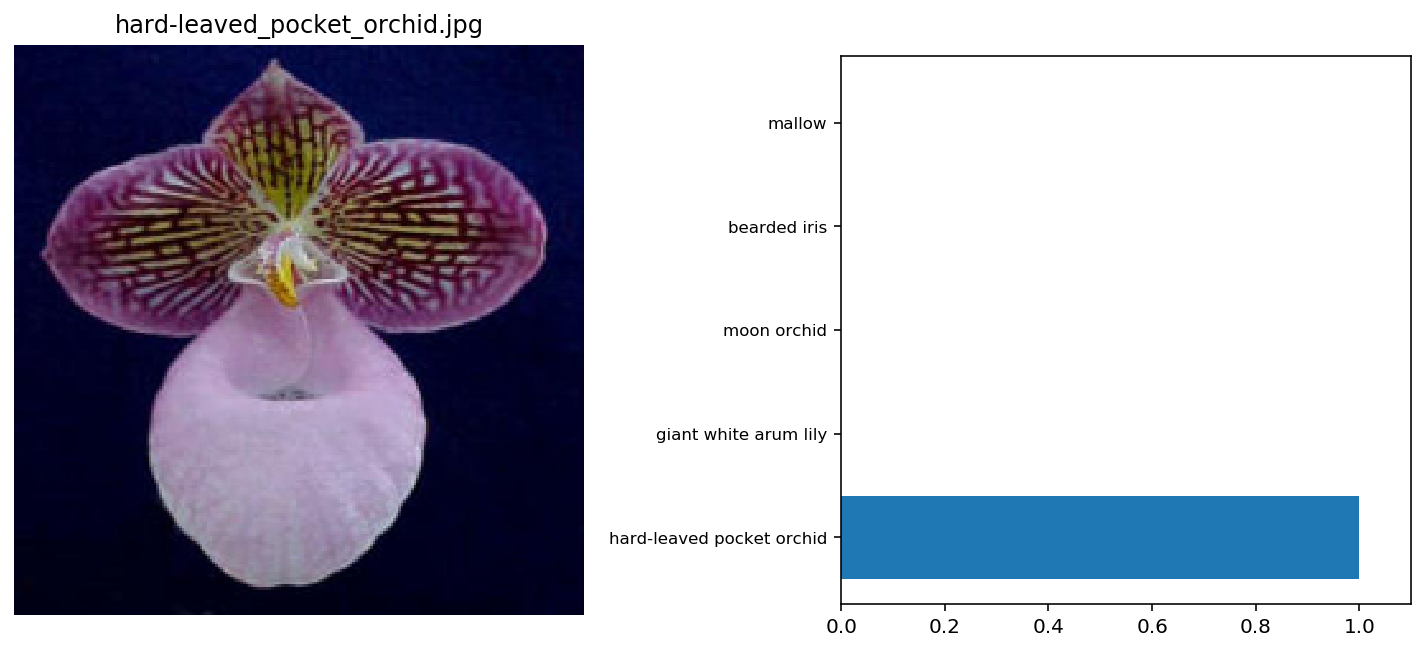

1/1 [==============================] - 0s 54ms/step


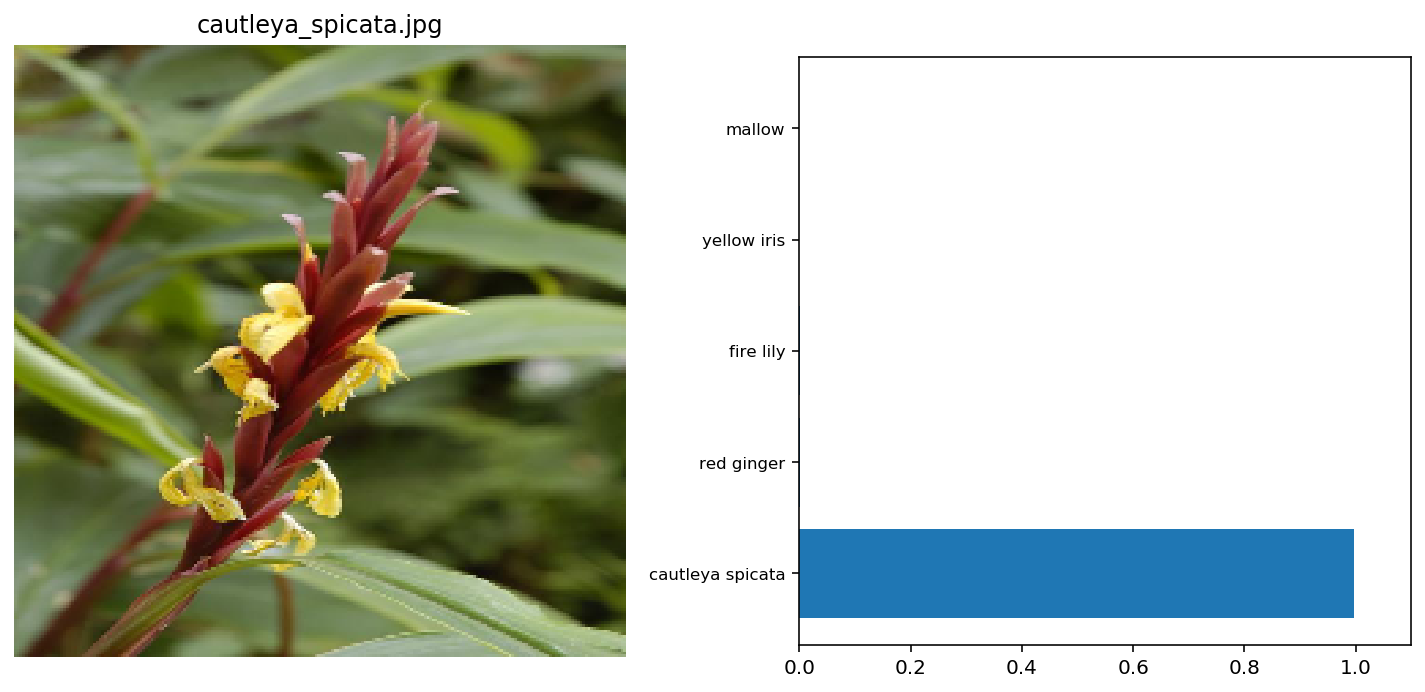

1/1 [==============================] - 0s 50ms/step


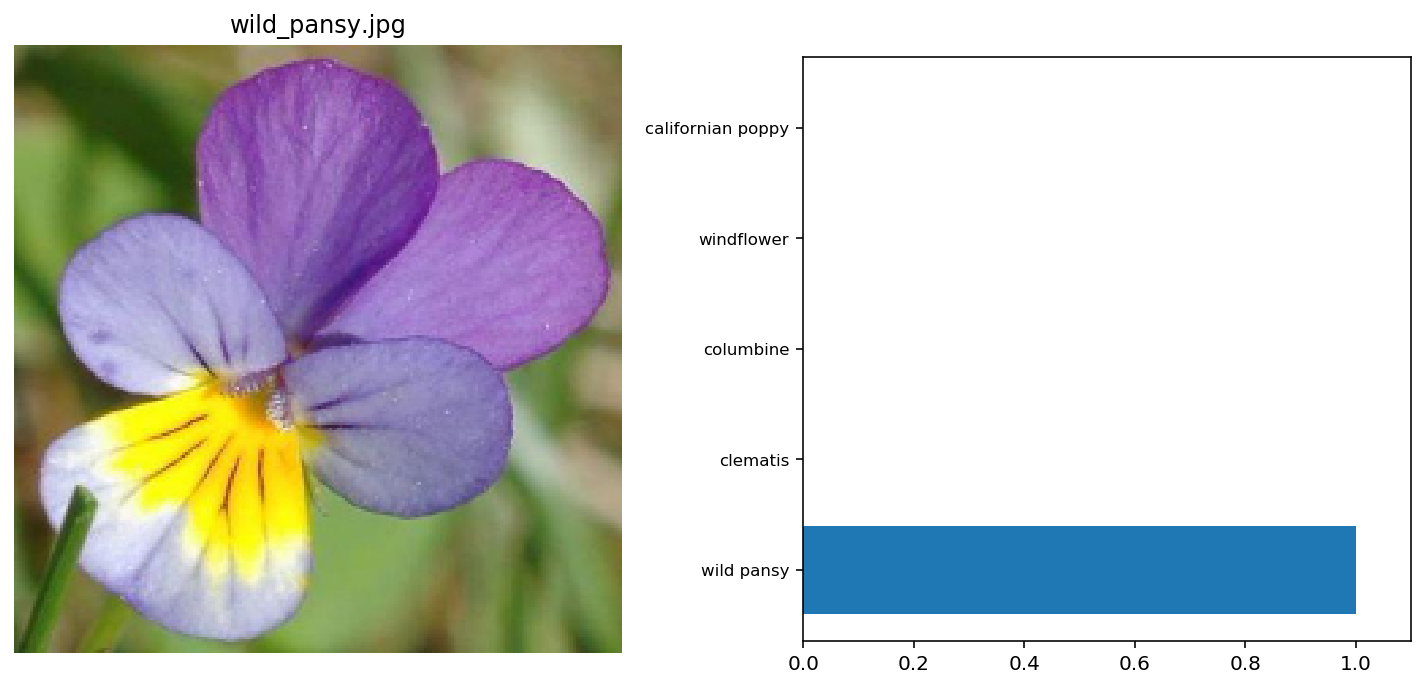

1/1 [==============================] - 0s 50ms/step


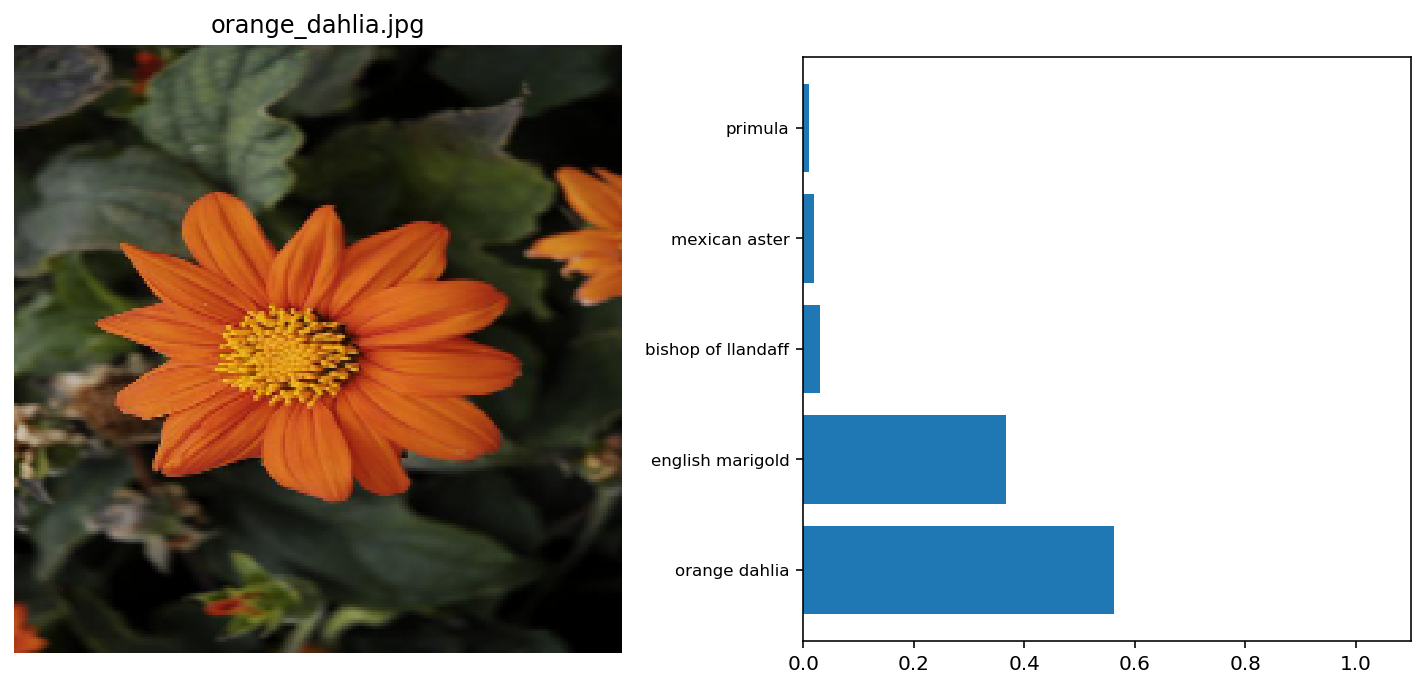

In [10]:
# TODO: Plot the input image along with the top 5 classes

from PIL import Image

image_path = './test_images'
k=5
for fname in os.listdir(image_path):
    path = os.path.join(image_path,fname)
    prob, cls = predict(path,model_load,k)
    im = Image.open(path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)
    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    ax1.imshow(processed_test_image)
    ax1.axis('off')
    ax1.set_title(fname)
    ax2.barh(np.arange(k),prob)
    ax2.set_aspect(0.2)
    ax2.set_yticks(np.arange(5))
    ytickslabels = [class_names[str(int(x)+1)] for x in cls]
    ax2.set_yticklabels(ytickslabels,size='small')
    ax2.set_xlim(0,1.1)
    plt.tight_layout()
    plt.show()